Natalia Guzman

Final Project - Maternal Health Risk

21/03/2025

In [ ]:
# Import all necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Understand dataset

df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [ ]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [ ]:
# Check for missing values
df.isnull().sum()

,0
Age,0
SystolicBP,0
DiastolicBP,0
BS,0
BodyTemp,0
HeartRate,0
RiskLevel,0


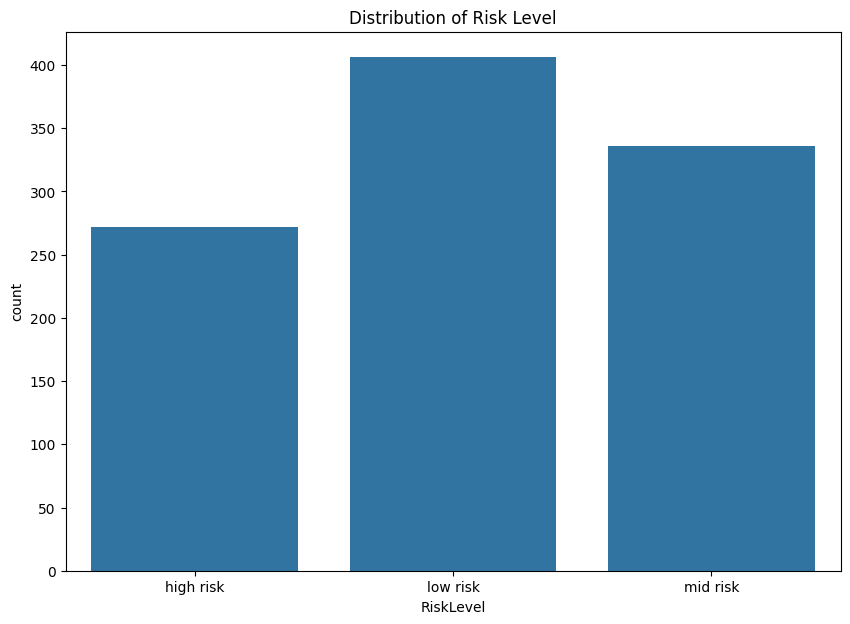

In [ ]:
# Let's visualize the data

plt.figure(figsize=(10,7))
sns.countplot(x= df['RiskLevel'])
plt.title('Distribution of Risk Level')
plt.show()

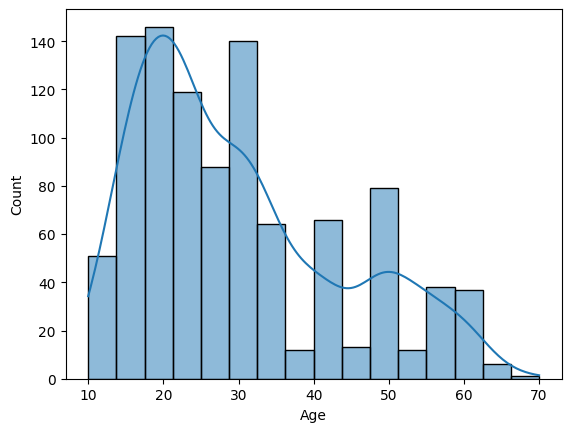

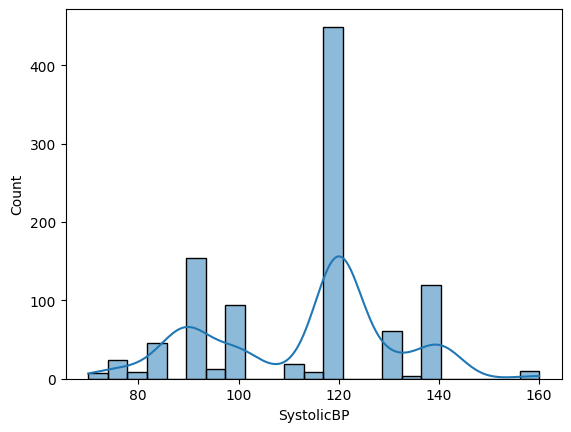

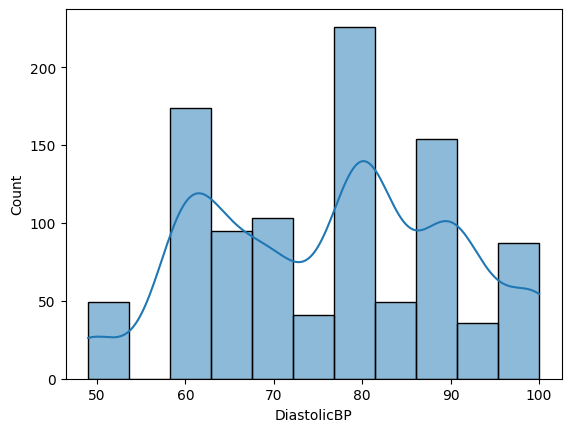

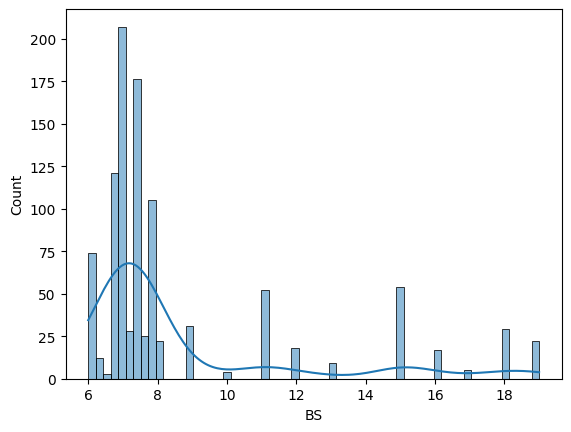

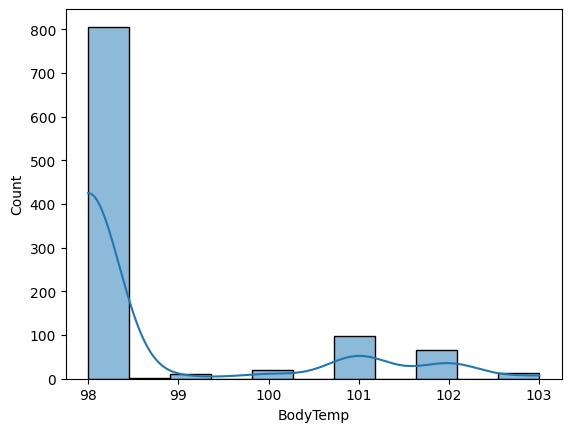

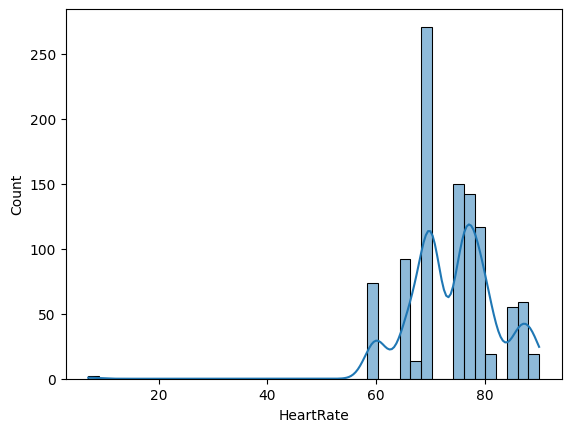

In [ ]:
features = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for feature in features:
  plt.figure()
  sns.histplot(data = df, x = feature, kde = True)
  plt.show()

<ipython-input-15-802c3f5623ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)


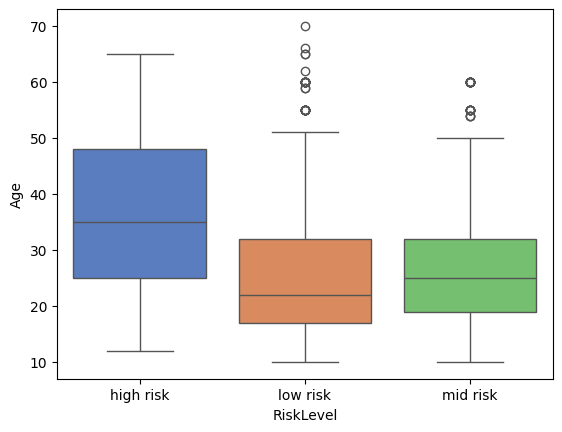

<ipython-input-15-802c3f5623ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)


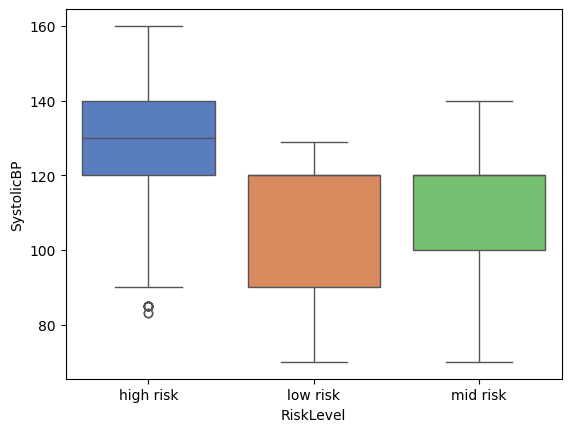

<ipython-input-15-802c3f5623ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)


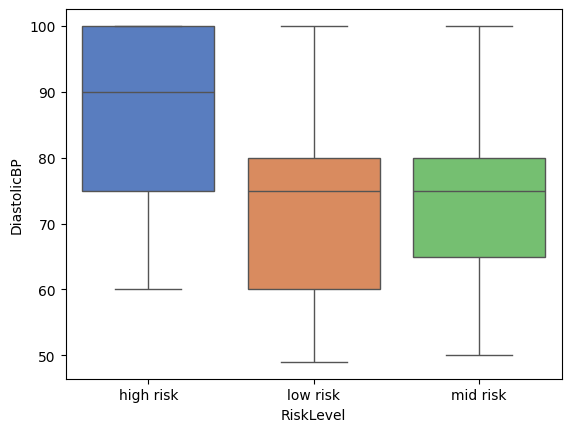

<ipython-input-15-802c3f5623ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)


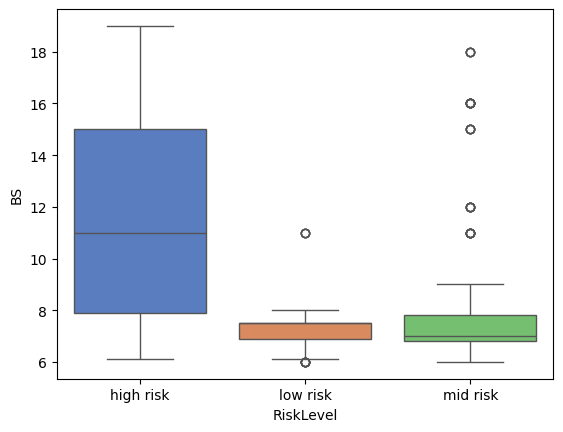

<ipython-input-15-802c3f5623ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)


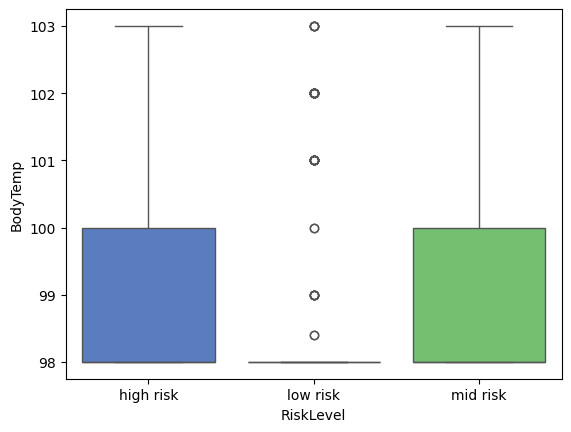

<ipython-input-15-802c3f5623ba>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)


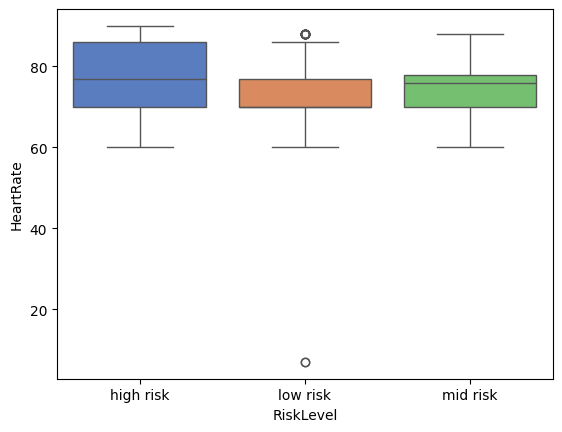

In [ ]:
# See relationship between features and target

for feature in features:
  plt.figure()
  sns.boxplot(x = 'RiskLevel', y = feature, palette = 'muted', data = df)
  plt.show()

In [ ]:
# Get rid of the outliers from BS

df.drop(index = df[df['HeartRate'] == 7].index,inplace = True)

In [ ]:
# Encode target variable so it is numerical

encoder = LabelEncoder()
df['RiskLevel'] = encoder.fit_transform(df['RiskLevel'])

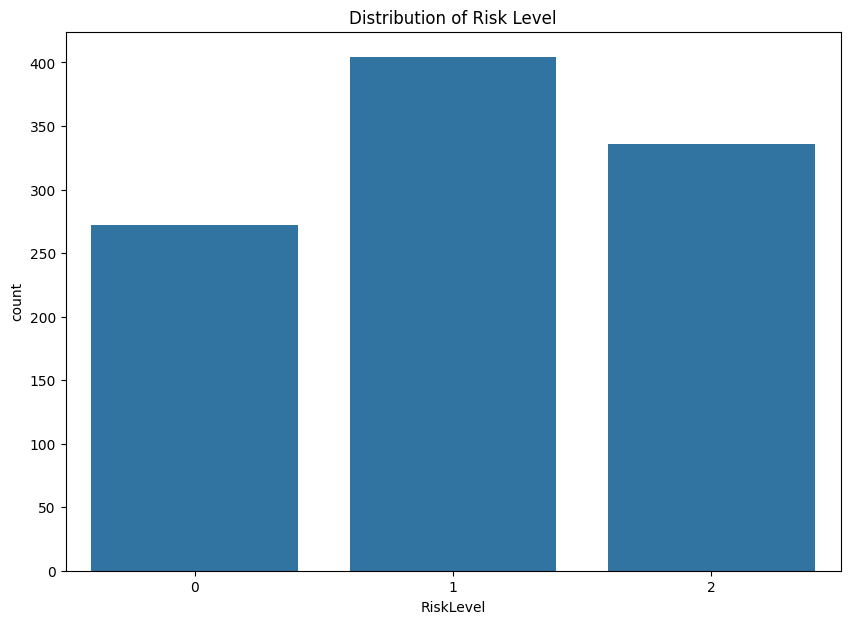

In [ ]:
# Confirm which number was assigned to each risk level, we see high is 0, low is 1, and medium is 2
plt.figure(figsize=(10,7))
sns.countplot(x= df['RiskLevel'])
plt.title('Distribution of Risk Level')
plt.show()

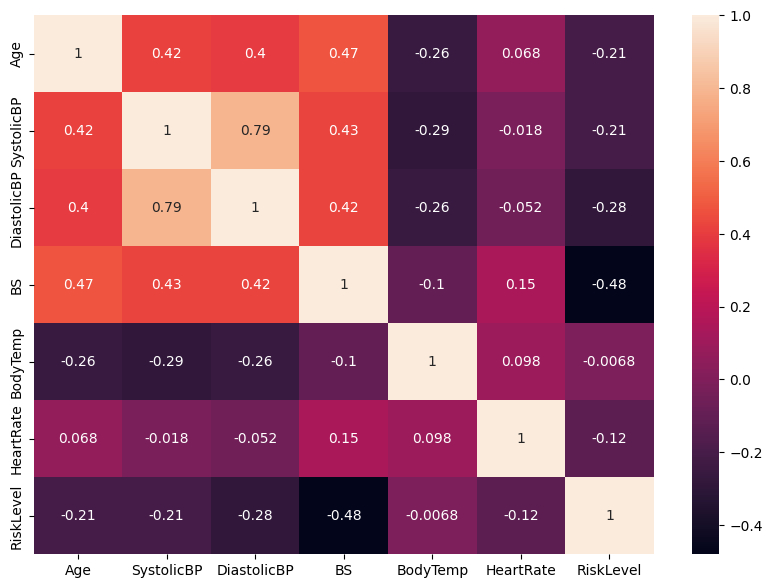

In [ ]:
# Visualize correlation between all the variables

plt.figure(figsize = (10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [ ]:
# Define X and Y

X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

In [ ]:
# Split into train and test sets, and scale

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree

dt_clf = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(dt_clf, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
print("Best parameters:", grid_dt.best_params_)

dt_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"DecisionTree Accuracy: {dt_accuracy}")
print("DecisionTree Classification Report:")
print(classification_report(y_test, dt_pred))

Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}
DecisionTree Accuracy: 0.8591549295774648
DecisionTree Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       104
           1       0.88      0.86      0.87       143
           2       0.78      0.83      0.81       108

    accuracy                           0.86       355
   macro avg       0.86      0.86      0.86       355
weighted avg       0.86      0.86      0.86       355



In [ ]:
# Logistic Regression

log_clf = LogisticRegression(random_state=42)
param_grid_lr = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10],
}

grid_lr = GridSearchCV(log_clf,
                       param_grid=param_grid_lr,
                       cv=5,
                       scoring='accuracy')
grid_lr.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
print("Best parameters:", grid_lr.best_params_)

lr_pred = best_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"LogisticRegression Accuracy: {lr_accuracy}")
print("LogisticRegression Classification Report:")
print(classification_report(y_test, lr_pred))

Best parameters: {'C': 1, 'penalty': 'l2'}
LogisticRegression Accuracy: 0.647887323943662
LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.61      0.69       104
           1       0.69      0.87      0.77       143
           2       0.45      0.40      0.42       108

    accuracy                           0.65       355
   macro avg       0.65      0.62      0.63       355
weighted avg       0.65      0.65      0.64       355



/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

In [ ]:
# Gradient Boosting

gb_clf = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}

grid_gb = GridSearchCV(gb_clf,
                       param_grid=param_grid_gb,
                       cv=5,
                       scoring='accuracy')
grid_gb.fit(X_train, y_train)

best_gb = grid_gb.best_estimator_
print("Best parameters:", grid_gb.best_params_)

gb_pred = best_gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print(f"GradientBoosting Accuracy: {gb_accuracy}")
print("GradientBoosting Classification Report:")
print(classification_report(y_test, gb_pred))

Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
GradientBoosting Accuracy: 0.8732394366197183
GradientBoosting Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88       104
           1       0.91      0.89      0.90       143
           2       0.80      0.87      0.84       108

    accuracy                           0.87       355
   macro avg       0.87      0.87      0.87       355
weighted avg       0.88      0.87      0.87       355



In [ ]:
# Random Forest

rf_clf = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15]
}

grid_rf = GridSearchCV(rf_clf,
                       param_grid=param_grid_rf,
                       cv=5,
                       scoring='accuracy')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print("Best parameters:", grid_rf.best_params_)

rf_pred = best_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"RandomForest Accuracy: {rf_accuracy}")
print("RandomForest Classification Report:")
print(classification_report(y_test, rf_pred))

Best parameters: {'criterion': 'gini', 'max_depth': None, 'n_estimators': 50}
RandomForest Accuracy: 0.8704225352112676
RandomForest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       104
           1       0.89      0.87      0.88       143
           2       0.81      0.87      0.84       108

    accuracy                           0.87       355
   macro avg       0.87      0.87      0.87       355
weighted avg       0.87      0.87      0.87       355



In [ ]:
# Ensemble Model

ensemble_clf = VotingClassifier(estimators=[
    ('GradientBoosting', best_gb),
    ('RandomForest', best_rf)
], voting='soft')

ensemble_clf.fit(X_train, y_train)

ensemble_pred = ensemble_clf.predict(X_test)
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print(f"Ensemble Accuracy: {ensemble_accuracy}")
print("Ensemble Model Classification Report:")
print(classification_report(y_test, ensemble_pred))

Ensemble Accuracy: 0.8760563380281691
Ensemble Model Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       104
           1       0.91      0.89      0.90       143
           2       0.81      0.87      0.84       108

    accuracy                           0.88       355
   macro avg       0.88      0.87      0.87       355
weighted avg       0.88      0.88      0.88       355

